# Predictive Modelling

Import Libraries

In [92]:
# pip install xgboost

In [93]:
# pip install sklearn

In [94]:
# pip install imblearn

In [95]:
# pip install lightgbm

Load Libraries

In [96]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imblearn_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GroupKFold, StratifiedKFold
import gc
from sklearn.metrics import roc_auc_score
import lightgbm as lgb 
import xgboost as xgb

Load Data

In [97]:
X = pd.read_csv('credit2.csv')
X.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,tr_Contacts_Count_12_mon,tr_Credit_Limit,tr_Total_Revolving_Bal,tr_Avg_Open_To_Buy,tr_Total_Amt_Chng_Q4_Q1,tr_Total_Trans_Amt,tr_Total_Trans_Ct,tr_Total_Ct_Chng_Q4_Q1,tr_Avg_Utilization_Ratio,Cluster
0,0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,...,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0
1,1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,...,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0
2,2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,...,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0
3,3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,...,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0
4,4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,...,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0


## Cluster Prediction

In [98]:
# Define response variable
response = ['Cluster']
y = X[response]

Converting Categorical to Ordinal Values

In [99]:
# PY - convert categorical to ordinal pls
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

def convert_cat(df,col):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    for c in col:
        item_list = df[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df[c].replace(d, inplace=True)
    return df
convert_cat(X,['Gender','Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

Gender
{'M': 0, 'F': 1}
Education_Level
{'High School': 0, 'Graduate': 1, 'Uneducated': 2, 'Unknown': 3, 'College': 4, 'Post-Graduate': 5, 'Doctorate': 6}
Marital_Status
{'Married': 0, 'Single': 1, 'Unknown': 2, 'Divorced': 3}
Income_Category
{'$60K - $80K': 0, 'Less than $40K': 1, '$80K - $120K': 2, '$40K - $60K': 3, '$120K +': 4, 'Unknown': 5}
Card_Category
{'Blue': 0, 'Gold': 1, 'Silver': 2, 'Platinum': 3}


,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,tr_Contacts_Count_12_mon,tr_Credit_Limit,tr_Total_Revolving_Bal,tr_Avg_Open_To_Buy,tr_Total_Amt_Chng_Q4_Q1,tr_Total_Trans_Amt,tr_Total_Trans_Ct,tr_Total_Ct_Chng_Q4_Q1,tr_Avg_Utilization_Ratio,Cluster
0,0,768805383,0,45,0,3,0,0,0,0,...,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,0
1,1,818770008,0,49,1,5,1,1,1,0,...,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0
2,2,713982108,0,51,0,3,1,0,2,0,...,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,0
3,3,769911858,0,40,1,4,0,2,1,0,...,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0
4,4,709106358,0,40,0,3,2,0,0,0,...,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,10122,772366833,0,50,0,2,1,1,3,0,...,0.492404,-0.509330,0.844455,-0.584929,-0.259771,3.259358,2.221481,0.608119,0.678714,3
10123,10123,710638233,1,41,0,2,3,3,3,0,...,0.492404,-0.479181,1.255524,-0.591639,0.201004,1.283475,0.176440,-0.122745,0.856458,0
10124,10124,716506083,1,44,1,1,0,0,1,0,...,1.396424,-0.354626,-1.426858,-0.226632,0.269436,1.732994,-0.207005,0.444305,-0.997155,1
10125,10125,717406983,1,30,0,2,1,2,3,0,...,0.492404,-0.368710,-1.426858,-0.240713,-1.026208,1.174848,-0.121795,0.041070,-0.997155,1


Columns that are identified below are to be dropped
(i) Used for prediction
(ii) Unique value
(iii) Highly correlated variable

In [100]:
X = X.drop(columns=['Unnamed: 0', 'CLIENTNUM', 'Attrition_Flag', 'Cluster', 'tr_Avg_Open_To_Buy', 'tr_Total_Trans_Amt','tr_Customer_Age', 'tr_Total_Relationship_Count', 'tr_Months_Inactive_12_mon', 'tr_Contacts_Count_12_mon', 'tr_Credit_Limit', 
                    'tr_Total_Revolving_Bal','tr_Total_Amt_Chng_Q4_Q1','tr_Total_Trans_Ct','tr_Total_Ct_Chng_Q4_Q1','tr_Avg_Utilization_Ratio'])
# Used for prediction : Attrition_Flag, Cluster
# Unique value : Unnamed, CLIENTNUM
# Highly correlated variable: 
# 1. Credit limit & Avg Open to buy = 1 --> Chose Credit Limit to keep in data
# 2. Total Trans Amt & Total trans ct = 0.81 --> Chose Transaction Count to keep in data

In [101]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,0,3,0,0,0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,1,5,1,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,0,3,1,0,2,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,1,4,0,2,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,0,3,2,0,0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,1,1,3,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,41,0,2,3,3,3,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,44,1,1,0,0,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,30,0,2,1,2,3,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Test/Train Split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
x_train.shape

(7595, 19)

### Predictive Model - Multi-Output Random Forest Classifier

Random Forest Classifier is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of the model. It is known to perform well on imbalanced datasets due to its ability to handle multiple classes and minimize overfitting.

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

# Train the decision tree classifier
clf = MultiOutputClassifier(RandomForestClassifier(max_depth=5, random_state=42))
clf.fit(x_train, y_train)

# Predict the output variables for test data
y_pred = clf.predict(x_test)

In [105]:
y_true = np.array([row for row in y_test.values])

In [106]:
y_true = y_true.tolist()
y_pred = y_pred.tolist()

In [107]:
y_train_pred = clf.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_true, y_pred)
if train_acc > test_acc:
    print("Warning: Model may be overfitting the training set")
else:
    print("Model is not overfitting")

Model is not overfitting


In [108]:
y_train_pred = y_train_pred.tolist()

In [109]:
predictedcluster = []
for i in y_pred:
    for j in i:
        predictedcluster.append(j)

In [110]:
y_train_list = y_train['Cluster'].tolist()

In [111]:
unique_clusters = list(set(predictedcluster))

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity


print("Train Data Set Performance")
for cluster in unique_clusters:
    # Create binary classification problem for the current cluster
    y_train_cluster = [1 if y_train_list[i] == cluster else 0 for i in range(len(y_true))]
    y_train_pred_cluster = [1 if y_train_pred[i][j] == cluster else 0 for i in range(len(y_pred)) for j in range(len(y_pred[i]))]
    
    # Calculate metrics for the current cluster
    acc = accuracy_score(y_train_cluster, y_train_pred_cluster)
    auc = roc_auc_score(y_train_cluster, y_train_pred_cluster)
    spec = specificity_score(y_train_cluster, y_train_pred_cluster)
    prec = precision_score(y_train_cluster, y_train_pred_cluster)
    recall = recall_score(y_train_cluster, y_train_pred_cluster)
    f1score = f1_score(y_train_cluster, y_train_pred_cluster)

    print("Cluster {}: accuracy={:.4f}, AUC={:.4f}, Specificity={:.4f}, Precision={:.4f}, Recall={:.4f}, F1 Score={:.4f} "
          .format(cluster, acc, auc, spec, prec, recall, f1score))


print("\nTest Data Set Performance")
for cluster in unique_clusters:
    # Create binary classification problem for the current cluster
    y_true_cluster = [1 if y_true[i][j] == cluster else 0 for i in range(len(y_true)) for j in range(len(y_true[i]))]
    y_pred_cluster = [1 if y_pred[i][j] == cluster else 0 for i in range(len(y_pred)) for j in range(len(y_pred[i]))]
    
    # Calculate metrics for the current cluster
    acc = accuracy_score(y_true_cluster, y_pred_cluster)
    auc = roc_auc_score(y_true_cluster, y_pred_cluster)
    spec = specificity_score(y_true_cluster, y_pred_cluster)
    prec = precision_score(y_true_cluster, y_pred_cluster)
    recall = recall_score(y_true_cluster, y_pred_cluster)
    f1score = f1_score(y_true_cluster, y_pred_cluster)

    print("Cluster {}: accuracy={:.4f}, AUC={:.4f}, Specificity={:.4f}, Precision={:.4f}, Recall={:.4f}, F1 Score={:.4f} "
          .format(cluster, acc, auc, spec, prec, recall, f1score))

Train Data Set Performance
Cluster 0: accuracy=0.9530, AUC=0.9412, Specificity=0.9784, Precision=0.9560, Recall=0.9040, F1 Score=0.9293 
Cluster 1: accuracy=0.9419, AUC=0.9444, Specificity=0.9277, Precision=0.9081, Recall=0.9611, F1 Score=0.9339 
Cluster 2: accuracy=0.9901, AUC=0.9739, Specificity=0.9959, Precision=0.9724, Recall=0.9520, F1 Score=0.9621 
Cluster 3: accuracy=0.9933, AUC=0.9735, Specificity=0.9982, Precision=0.9837, Recall=0.9488, F1 Score=0.9659 

Test Data Set Performance
Cluster 0: accuracy=0.9601, AUC=0.9493, Specificity=0.9849, Precision=0.9699, Recall=0.9137, F1 Score=0.9410 
Cluster 1: accuracy=0.9494, AUC=0.9528, Specificity=0.9308, Precision=0.9119, Recall=0.9748, F1 Score=0.9423 
Cluster 2: accuracy=0.9917, AUC=0.9769, Specificity=0.9968, Precision=0.9780, Recall=0.9569, F1 Score=0.9673 
Cluster 3: accuracy=0.9913, AUC=0.9618, Specificity=0.9987, Precision=0.9873, Recall=0.9249, F1 Score=0.9551 


Confusion matrix:
[[ 805   22    0    3]
 [  75 1046   14   12]
 [   0    3  311    4]
 [   1    2    0  234]]


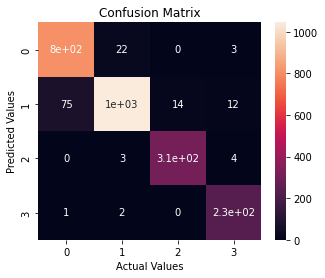

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       881
           1       0.91      0.97      0.94      1073
           2       0.98      0.96      0.97       325
           3       0.99      0.92      0.96       253

    accuracy                           0.95      2532
   macro avg       0.96      0.94      0.95      2532
weighted avg       0.95      0.95      0.95      2532



In [112]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_transposed = cm.T
print("Confusion matrix:")
print(cm_transposed)

cm_df = pd.DataFrame(cm_transposed,
                     index = ['0','1','2','3'], 
                     columns = ['0','1','2','3'])

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

# Calculate the classification report
cr = classification_report(y_true, y_pred)
print("Classification report:")
print(cr)

## Cluster Analysis
What is the demographic inside each predicted cluster?

In [113]:
x_test['pcluster']=predictedcluster


# Create new dataframe for aggregated values
customercluster = pd.DataFrame({'Total': x_test["pcluster"].value_counts()})

# Counts
gender = (x_test.loc[x_test['Gender'] == 0, 'pcluster']).value_counts()
customercluster['Gender=0'] = gender
# Ratio
customercluster['Male'] = customercluster['Gender=0']/customercluster['Total']


gender1 = (x_test.loc[x_test['Gender'] == 1, 'pcluster']).value_counts()
customercluster['Gender=1'] = gender1
customercluster['Female'] = customercluster['Gender=1']/customercluster['Total']


transct0 = (x_test.loc[x_test['Total_Trans_Ct'] <50, 'pcluster']).value_counts()
customercluster['transct0'] = transct0
customercluster['transctbelow50'] = customercluster['transct0']/customercluster['Total']
transct1 = (x_test.loc[((x_test['Total_Trans_Ct'] < 60) & (x_test['Total_Trans_Ct'] >= 50)), 'pcluster']).value_counts()
customercluster['transct1'] = transct1
customercluster['transct50to60'] = customercluster['transct1']/customercluster['Total']
transct2 = (x_test.loc[((x_test['Total_Trans_Ct'] < 70) & (x_test['Total_Trans_Ct'] >= 60)), 'pcluster']).value_counts()
customercluster['transct2'] = transct2
customercluster['transct60to70'] = customercluster['transct2']/customercluster['Total']
transct3 = (x_test.loc[x_test['Total_Trans_Ct'] >=70, 'pcluster']).value_counts()
customercluster['transct3'] = transct3
customercluster['transctabove70'] = customercluster['transct3']/customercluster['Total']

#Revolving balance
revbal0 = (x_test.loc[x_test['Total_Revolving_Bal'] < 500, 'pcluster']).value_counts()
customercluster['revbal0'] = revbal0
customercluster['revbalbelow500'] = customercluster['revbal0']/customercluster['Total']
revbal1 = (x_test.loc[((x_test['Total_Revolving_Bal'] <= 1500) & (x_test['Total_Revolving_Bal'] >= 500)), 'pcluster']).value_counts()
customercluster['revbal1'] = revbal1
customercluster['revbal500to1500'] = customercluster['revbal1']/customercluster['Total']
revbal2 = (x_test.loc[((x_test['Total_Revolving_Bal'] <= 2000) & (x_test['Total_Revolving_Bal'] >= 1500)), 'pcluster']).value_counts()
customercluster['revbal2'] = revbal2
customercluster['revbalz1500to2000'] = customercluster['revbal2']/customercluster['Total']
revbal3 = (x_test.loc[x_test['Total_Revolving_Bal'] > 2000, 'pcluster']).value_counts()
customercluster['revbal3'] = revbal3
customercluster['revbalzabove2000'] = customercluster['revbal3']/customercluster['Total']

#Income category
inc0 = (x_test.loc[x_test['Income_Category'] == 0, 'pcluster']).value_counts()
customercluster['inc0'] = inc0
customercluster['$60K - $80K'] = customercluster['inc0']/customercluster['Total']
inc1 = (x_test.loc[x_test['Income_Category'] == 1, 'pcluster']).value_counts()
customercluster['inc1'] = inc1
customercluster['Less than $40K'] = customercluster['inc1']/customercluster['Total']
inc2 = (x_test.loc[x_test['Income_Category'] == 2, 'pcluster']).value_counts()
customercluster['inc2'] = inc2
customercluster['$80K - $120K'] = customercluster['inc2']/customercluster['Total']
inc3 = (x_test.loc[x_test['Income_Category'] == 3, 'pcluster']).value_counts()
customercluster['inc3'] = inc3
customercluster['$40K - $60K'] = customercluster['inc3']/customercluster['Total']
inc4 = (x_test.loc[x_test['Income_Category'] == 4, 'pcluster']).value_counts()
customercluster['inc4'] = inc4
customercluster['$120K +'] = customercluster['inc4']/customercluster['Total']
inc5 = (x_test.loc[x_test['Income_Category'] == 5, 'pcluster']).value_counts()
customercluster['inc5'] = inc5
customercluster['Unknown'] = customercluster['inc5']/customercluster['Total']


credlim0 = (x_test.loc[x_test['Credit_Limit'] < 3000, 'pcluster']).value_counts()
customercluster['credlim0'] = credlim0
customercluster['credlimbelow3k'] = customercluster['credlim0']/customercluster['Total']
credlim1 = (x_test.loc[((x_test['Credit_Limit'] <= 7000) & (x_test['Credit_Limit'] >= 3000)), 'pcluster']).value_counts()
customercluster['credlim1'] = credlim1
customercluster['credlim3-7k'] = customercluster['credlim1']/customercluster['Total']
credlim2 = (x_test.loc[x_test['Credit_Limit'] > 7000, 'pcluster']).value_counts()
customercluster['credlim2'] = credlim2
customercluster['credlimzabove7k'] = customercluster['credlim2']/customercluster['Total']


relation0 = (x_test.loc[x_test['Total_Relationship_Count'] <3, 'pcluster']).value_counts()
customercluster['relation0'] = relation0
customercluster['relationlessthan3'] = customercluster['relation0']/customercluster['Total']
relation1 = (x_test.loc[((x_test['Total_Relationship_Count'] < 5) & (x_test['Total_Relationship_Count'] >= 3)), 'pcluster']).value_counts()
customercluster['relation1'] = relation1
customercluster['relation3to4'] = customercluster['relation1']/customercluster['Total']
relation2 = (x_test.loc[((x_test['Total_Relationship_Count'] < 6) & (x_test['Total_Relationship_Count'] >= 5)), 'pcluster']).value_counts()
customercluster['relation2'] = relation2
customercluster['relation5'] = customercluster['relation2']/customercluster['Total']
relation3 = (x_test.loc[x_test['Total_Relationship_Count'] >=6, 'pcluster']).value_counts()
customercluster['relation3'] = relation3
customercluster['relation6'] = customercluster['relation3']/customercluster['Total']


util0 = (x_test.loc[x_test['Avg_Utilization_Ratio'] <0.2, 'pcluster']).value_counts()
customercluster['util0'] = util0
customercluster['util<0.2'] = customercluster['util0']/customercluster['Total']
util1 = (x_test.loc[((x_test['Avg_Utilization_Ratio'] < 0.4) & (x_test['Avg_Utilization_Ratio'] >= 0.2)), 'pcluster']).value_counts()
customercluster['util1'] = util1
customercluster['util0.2-0.4'] = customercluster['util1']/customercluster['Total']
util2 = (x_test.loc[((x_test['Avg_Utilization_Ratio'] < 0.5) & (x_test['Avg_Utilization_Ratio'] >= 0.4)), 'pcluster']).value_counts()
customercluster['util2'] = util2
customercluster['util0.4-0.5'] = customercluster['util2']/customercluster['Total']
util3 = (x_test.loc[x_test['Avg_Utilization_Ratio'] >=0.5, 'pcluster']).value_counts()
customercluster['util3'] = util3
customercluster['util>=0.5'] = customercluster['util3']/customercluster['Total']


customercluster = customercluster.drop(columns=['util0','util1','util2','util3','relation0','relation1','relation2','relation3','credlim0','credlim1','credlim2','transct0','transct1','transct2','transct3','revbal0','revbal1','revbal2','revbal3','Gender=1','inc0','inc1','inc2','inc3','inc4','inc5','Gender=0']) 


customercluster.iloc[:,0:11]


,Total,Male,Female,transctbelow50,transct50to60,transct60to70,transctabove70,revbalbelow500,revbal500to1500,revbalz1500to2000,revbalzabove2000
1,1147,0.467306,0.532694,0.383609,0.097646,0.189189,0.329555,0.456844,0.306888,0.149956,0.086312
0,830,0.298795,0.701205,0.287952,0.089157,0.168675,0.454217,NaN,0.395181,0.316867,0.287952
2,318,0.833333,0.166667,0.305031,0.132075,0.194969,0.367925,0.261006,0.377358,0.191824,0.169811
3,237,0.578059,0.421941,NaN,0.012658,0.021097,0.966245,0.151899,0.413502,0.227848,0.206751


In [114]:
# Metrics that are deemed to be similar across all clusters are commented

#inact0 = (x_test.loc[x_test['Months_Inactive_12_mon'] <2, 'pcluster']).value_counts()
#customercluster['inact0'] = inact0
#customercluster['inact0r'] = customercluster['inact0']/customercluster['Total']
#inact1 = (x_test.loc[((x_test['Months_Inactive_12_mon'] < 3) & (x_test['Months_Inactive_12_mon'] >= 2)), 'pcluster']).value_counts()
#customercluster['inact1'] = inact1
#customercluster['inact1r'] = customercluster['inact1']/customercluster['Total']
#inact2 = (x_test.loc[((x_test['Months_Inactive_12_mon'] < 4) & (x_test['Months_Inactive_12_mon'] >= 3)), 'pcluster']).value_counts()
#customercluster['inact2'] = inact2
#customercluster['inact2r'] = customercluster['inact2']/customercluster['Total']
#inact3 = (x_test.loc[x_test['Months_Inactive_12_mon'] >=4, 'pcluster']).value_counts()
#customercluster['inact3'] = inact3
#customercluster['inact3r'] = customercluster['inact3']/customercluster['Total']

#customercluster['transctbelowmean'] = transctbelowmean
#customercluster['transctbelowmean_Ratio'] = customercluster['transctbelowmean']/customercluster['Total']
#transctz0to1 = (x_test.loc[((x_test['tr_Total_Trans_Ct'] < 1) & (x_test['tr_Total_Trans_Ct'] >= 0)), 'pcluster']).value_counts()
#customercluster['transctz0to1'] = transctz0to1
#customercluster['transctz0to1_Ratio'] = customercluster['transctz0to1']/customercluster['Total']
#transctzabove1 = (x_test.loc[x_test['tr_Total_Trans_Ct'] >=1, 'pcluster']).value_counts()
#customercluster['transctzabove1'] = transctzabove1
#customercluster['transctzabove1_Ratio'] = customercluster['transctzabove1']/customercluster['Total']
#dpd0 = (x_test.loc[x_test['Dependent_count'] == 0, 'pcluster']).value_counts()
#customercluster['dpd0'] = dpd0
#customercluster['dpd0_Ratio'] = customercluster['dpd0']/customercluster['Total']
#dpd1 = (x_test.loc[x_test['Dependent_count'] == 1, 'pcluster']).value_counts()
#customercluster['dpd1'] = dpd1
#customercluster['dpd1_Ratio'] = customercluster['dpd1']/customercluster['Total']
#dpd2 = (x_test.loc[x_test['Dependent_count'] == 2, 'pcluster']).value_counts()
#customercluster['dpd2'] = dpd2
#customercluster['dpd2_Ratio'] = customercluster['dpd2']/customercluster['Total']
#dpd3 = (x_test.loc[x_test['Dependent_count'] == 3, 'pcluster']).value_counts()
#customercluster['dpd3'] = dpd3
#customercluster['dpd3_Ratio'] = customercluster['dpd3']/customercluster['Total']
#dpd4 = (x_test.loc[x_test['Dependent_count'] > 3, 'pcluster']).value_counts()
#customercluster['dpd4'] = dpd4
#customercluster['dpd4_Ratio'] = customercluster['dpd4']/customercluster['Total']
#edu0 = (x_test.loc[x_test['Education_Level'] == 0, 'pcluster']).value_counts()
#customercluster['EduLevel0'] = edu0
#customercluster['edu0_Ratio'] = customercluster['EduLevel0']/customercluster['Total']
#edu1 = (x_test.loc[x_test['Education_Level'] == 1, 'pcluster']).value_counts()
#customercluster['EduLevel1'] = edu1
#customercluster['edu1_Ratio'] = customercluster['EduLevel1']/customercluster['Total']
#edu2 = (x_test.loc[x_test['Education_Level'] == 2, 'pcluster']).value_counts()
#customercluster['EduLevel2'] = edu2
#customercluster['edu2_Ratio'] = customercluster['EduLevel2']/customercluster['Total']
#edu3 = (x_test.loc[x_test['Education_Level'] == 3, 'pcluster']).value_counts()
#customercluster['EduLevel3'] = edu3
#customercluster['edu3_Ratio'] = customercluster['EduLevel3']/customercluster['Total']
#edu4 = (x_test.loc[x_test['Education_Level'] == 4, 'pcluster']).value_counts()
#customercluster['EduLevel4'] = edu4
#customercluster['edu4_Ratio'] = customercluster['EduLevel4']/customercluster['Total']
#edu5 = (x_test.loc[x_test['Education_Level'] == 5, 'pcluster']).value_counts()
#customercluster['EduLevel5'] = edu5
#customercluster['edu5_Ratio'] = customercluster['EduLevel5']/customercluster['Total']
#edu6 = (x_test.loc[x_test['Education_Level'] == 6, 'pcluster']).value_counts()
#customercluster['EduLevel6'] = edu6
#customercluster['edu6_Ratio'] = customercluster['EduLevel6']/customercluster['Total']
#mar0 = (x_test.loc[x_test['Marital_Status'] == 0, 'pcluster']).value_counts()
#customercluster['mar0'] = mar0
#customercluster['mar0_Ratio'] = customercluster['mar0']/customercluster['Total']
#mar1 = (x_test.loc[x_test['Marital_Status'] == 1, 'pcluster']).value_counts()
#customercluster['mar1'] = mar1
#customercluster['mar1_Ratio'] = customercluster['mar1']/customercluster['Total']
#mar2 = (x_test.loc[x_test['Marital_Status'] == 2, 'pcluster']).value_counts()
#customercluster['mar2'] = mar2
#customercluster['mar2_Ratio'] = customercluster['mar2']/customercluster['Total']
#mar3 = (x_test.loc[x_test['Marital_Status'] == 3, 'pcluster']).value_counts()
#customercluster['mar3'] = mar3
#customercluster['mar3_Ratio'] = customercluster['mar3']/customercluster['Total']

#agebelow40 = (x_test.loc[x_test['Customer_Age'] < 40, 'pcluster']).value_counts()
#customercluster['agebelow40'] = agebelow40
#customercluster['agebelow40_Ratio'] = customercluster['agebelow40']/customercluster['Total']
#age40to49 = (x_test.loc[((x_test['Customer_Age'] < 50) & (x_test['Customer_Age'] >= 40)), 'pcluster']).value_counts()
#customercluster['age40to49'] = age40to49
#customercluster['age40to49_Ratio'] = customercluster['age40to49']/customercluster['Total']
#age50to59 = (x_test.loc[((x_test['Customer_Age'] < 60) & (x_test['Customer_Age'] >= 50)), 'pcluster']).value_counts()
#customercluster['age50to59'] = age50to59
#customercluster['age50to59_Ratio'] = customercluster['age50to59']/customercluster['Total']
#age60above = (x_test.loc[x_test['Customer_Age'] >= 60, 'pcluster']).value_counts()
#customercluster['age60above'] = age60above
#customercluster['age60above_Ratio'] = customercluster['age60above']/customercluster['Total']
#credlim0 = (x_test.loc[x_test['tr_Credit_Limit'] < -0.5, 'pcluster']).value_counts()
#customercluster['credlim0'] = credlim0
#customercluster['credlimzbelow-0.5'] = customercluster['credlim0']/customercluster['Total']
#credlim1 = (x_test.loc[((x_test['tr_Credit_Limit'] <= 0.5) & (x_test['tr_Credit_Limit'] >= -0.5)), 'pcluster']).value_counts()
#customercluster['credlim1'] = credlim1
#customercluster['credlimaroundmean'] = customercluster['credlim1']/customercluster['Total']
#credlim2 = (x_test.loc[x_test['tr_Credit_Limit'] > 0.5, 'pcluster']).value_counts()
#customercluster['credlim2'] = credlim2
#customercluster['credlimzabove0.5'] = customercluster['credlim2']/customercluster['Total']

#customercluster = customercluster.drop(columns=['Gender','dpd0', 'dpd1','dpd2','dpd3','dpd4','agebelow40','age40to49','age50to59','age60above','inc0','inc1','inc2','inc3','inc4','inc5','Gender=0','mar0','mar1','mar2','mar3','EduLevel0', 'EduLevel1','EduLevel2', 'EduLevel3','EduLevel4', 'EduLevel5','EduLevel6']) #
#customercluster1 = customercluster.drop(columns=['transctbelow50','transct50to60','transct60to70','transctabove70','revbalbelow500','revbal500to1500','revbalz1500to2000', 'revbalzabove2000'])

# customercluster.iloc[:,11:24]
# customercluster.iloc[:,24:]

## TO VIEW EACH CLUSTER'S TOP CONTRIBUTING METRICS

In [115]:
rslt_df_0 = customercluster.sort_values(by = 0, axis = 1, ascending = False)
rslt_df_0.iloc[1]

Total                830.000000
util>=0.5              0.778313
Female                 0.701205
credlimbelow3k         0.700000
Less than $40K         0.553012
transctabove70         0.454217
relation3to4           0.432530
revbal500to1500        0.395181
revbalz1500to2000      0.316867
credlim3-7k            0.300000
Male                   0.298795
revbalzabove2000       0.287952
transctbelow50         0.287952
relation6              0.210843
relation5              0.208434
$40K - $60K            0.189157
transct60to70          0.168675
util0.4-0.5            0.156627
relationlessthan3      0.148193
transct50to60          0.089157
$60K - $80K            0.080723
Unknown                0.079518
$80K - $120K           0.074699
util0.2-0.4            0.065060
$120K +                0.022892
revbalbelow500              NaN
credlimzabove7k             NaN
util<0.2                    NaN
Name: 0, dtype: float64

In [116]:
rslt_df_1 = customercluster.sort_values(by = 1, axis = 1, ascending = False)
rslt_df_1.iloc[0]

Total                1147.000000
util<0.2                0.741935
Female                  0.532694
Male                    0.467306
revbalbelow500          0.456844
relation3to4            0.445510
credlimzabove7k         0.409765
transctbelow50          0.383609
credlim3-7k             0.360942
Less than $40K          0.338274
transctabove70          0.329555
revbal500to1500         0.306888
util0.2-0.4             0.246731
credlimbelow3k          0.229294
relation5               0.208370
relation6               0.196164
transct60to70           0.189189
$40K - $60K             0.181343
$60K - $80K             0.169137
revbalz1500to2000       0.149956
relationlessthan3       0.149956
Unknown                 0.135135
$80K - $120K            0.122058
transct50to60           0.097646
revbalzabove2000        0.086312
$120K +                 0.054054
util0.4-0.5             0.011334
util>=0.5                    NaN
Name: 1, dtype: float64

In [117]:
rslt_df_2 = customercluster.sort_values(by = 2, axis = 1, ascending = False)
rslt_df_2.iloc[2]

Total                318.000000
credlimzabove7k        1.000000
util<0.2               1.000000
Male                   0.833333
$80K - $120K           0.402516
revbal500to1500        0.377358
relation3to4           0.377358
transctabove70         0.367925
transctbelow50         0.305031
revbalbelow500         0.261006
$120K +                0.254717
relationlessthan3      0.242138
relation6              0.198113
transct60to70          0.194969
revbalz1500to2000      0.191824
relation5              0.182390
revbalzabove2000       0.169811
Female                 0.166667
Unknown                0.163522
$60K - $80K            0.141509
transct50to60          0.132075
$40K - $60K            0.037736
Less than $40K              NaN
credlimbelow3k              NaN
credlim3-7k                 NaN
util0.2-0.4                 NaN
util0.4-0.5                 NaN
util>=0.5                   NaN
Name: 2, dtype: float64

In [118]:
rslt_df_3 = customercluster.sort_values(by = 3, axis = 1, ascending = False)
rslt_df_3.iloc[3]

Total                237.000000
transctabove70         0.966245
relationlessthan3      0.717300
util<0.2               0.654008
credlimzabove7k        0.624473
Male                   0.578059
Female                 0.421941
revbal500to1500        0.413502
credlim3-7k            0.362869
Less than $40K         0.303797
revbalz1500to2000      0.227848
util0.2-0.4            0.206751
revbalzabove2000       0.206751
$80K - $120K           0.202532
relation3to4           0.198312
$40K - $60K            0.172996
$60K - $80K            0.156118
revbalbelow500         0.151899
Unknown                0.084388
$120K +                0.080169
relation5              0.071730
util>=0.5              0.071730
util0.4-0.5            0.067511
transct60to70          0.021097
credlimbelow3k         0.012658
relation6              0.012658
transct50to60          0.012658
transctbelow50              NaN
Name: 3, dtype: float64